In [1]:
library(tableone)
library(tidyverse)

Warning message:
"package 'tableone' was built under R version 4.3.3"
Warning message:
"package 'tidyverse' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'forcats' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data_dir <- file.path("..", "data")

In [3]:
full_data <- readRDS(file.path(data_dir, "full_data_ps.rds"))
head(full_data)
colnames(full_data)

,stay_id,hadm_id,subject_id,gender,age,sapsii,icu_intime,icu_outtime,weight,sofa_24hours,⋯,lab_potassium_flag,lab_troponin_flag,lab_po2_flag,lab_lactate_flag,gcs_int,ca_int,event_state_int,mort_28_day_int,ps,ps_weight
,<int>,<int>,<int>,<fct>,<dbl>,<int>,<dttm>,<dttm>,<dbl>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,38302142,20475690,13620446,F,66.04835,31,2159-01-21 01:45:32,2159-01-25 14:09:02,138.0,1,⋯,1,0,1,1,0,1,1,0,0.21258232,1.269974
2,31869153,21383344,15359363,F,41.91122,39,2166-12-02 16:08:45,2166-12-05 02:10:02,70.0,0,⋯,1,0,0,0,1,NA,0,0,0.57470795,1.740014
3,31501167,20944291,12162143,F,87.59137,35,2174-08-05 00:49:12,2174-08-06 16:13:22,65.0,1,⋯,1,0,1,1,0,1,0,0,0.06522099,1.069772
4,39256124,24959920,18226317,M,66.88656,28,2130-11-20 19:28:29,2130-11-25 12:42:59,88.0,3,⋯,1,0,0,0,0,1,0,0,0.07393880,1.079842
5,31132695,28164203,15928453,F,44.39155,55,2113-05-24 00:14:32,2113-05-29 14:24:45,45.9,10,⋯,1,0,1,1,0,1,1,0,0.04781580,1.050217
6,39784690,23246205,16810503,M,56.61848,30,2149-08-14 21:32:37,2149-08-21 12:15:14,80.0,3,⋯,1,0,1,1,0,1,0,0,0.03225958,1.033335


[1] "stay_id"                        "hadm_id"                       
  [3] "subject_id"                     "gender"                        
  [5] "age"                            "sapsii"                        
  [7] "icu_intime"                     "icu_outtime"                   
  [9] "weight"                         "sofa_24hours"                  
 [11] "infection"                      "mort_28_day"                   
 [13] "survival_days"                  "gcs_include"                   
 [15] "gcs_include_combine"            "vs_heart_rate_first"           
 [17] "vs_heart_rate_min"              "vs_heart_rate_max"             
 [19] "vs_cvp_first"                   "vs_cvp_min"                    
 [21] "vs_cvp_max"                     "vs_map_first"                  
 [23] "vs_map_min"                     "vs_map_max"                    
 [25] "vs_temp_first"                  "vs_temp_min"                   
 [27] "vs_temp_max"                    "lab_hemoglobin_first"          
 [29] "lab_hemoglobin_min"             "lab_hemoglobin_max"            
 [31] "lab_hemoglobin_abnormal"        "lab_platelet_first"            
 [33] "lab_platelet_min"               "lab_platelet_max"              
 [35] "lab_platelet_abnormal"          "lab_creatinine_kinase_first"   
 [37] "lab_creatinine_kinase_min"      "lab_creatinine_kinase_max"     
 [39] "lab_creatinine_kinase_abnormal" "lab_wbc_first"                 
 [41] "lab_wbc_min"                    "lab_wbc_max"                   
 [43] "lab_wbc_abnormal"               "lab_ph_first"                  
 [45] "lab_ph_min"                     "lab_ph_max"                    
 [47] "lab_ph_abnormal"                "lab_chloride_first"            
 [49] "lab_chloride_min"               "lab_chloride_max"              
 [51] "lab_chloride_abnormal"          "lab_sodium_first"              
 [53] "lab_sodium_min"                 "lab_sodium_max"                
 [55] "lab_sodium_abnormal"            "lab_bun_first"                 
 [57] "lab_bun_min"                    "lab_bun_max"                   
 [59] "lab_bun_abnormal"               "lab_bicarbonate_first"         
 [61] "lab_bicarbonate_min"            "lab_bicarbonate_max"           
 [63] "lab_bicarbonate_abnormal"       "lab_pco2_first"                
 [65] "lab_pco2_min"                   "lab_pco2_max"                  
 [67] "lab_pco2_abnormal"              "lab_creatinine_first"          
 [69] "lab_creatinine_min"             "lab_creatinine_max"            
 [71] "lab_creatinine_abnormal"        "lab_potassium_first"           
 [73] "lab_potassium_min"              "lab_potassium_max"             
 [75] "lab_potassium_abnormal"         "lab_troponin_first"            
 [77] "lab_troponin_min"               "lab_troponin_max"              
 [79] "lab_troponin_abnormal"          "lab_po2_first"                 
 [81] "lab_po2_min"                    "lab_po2_max"                   
 [83] "lab_po2_abnormal"               "lab_lactate_first"             
 [85] "lab_lactate_min"                "lab_lactate_max"               
 [87] "lab_lactate_abnormal"           "pre_dose_val_rx"               
 [89] "los_drug"                       "cumulative_dose"               
 [91] "gcs"                            "ca"                            
 [93] "infection_flag"                 "dose_val_rx_average"           
 [95] "los_drug_average"               "event_state"                   
 [97] "vs_heart_rate_flag"             "vs_cvp_flag"                   
 [99] "vs_map_flag"                    "vs_temp_flag"                  
[101] "lab_hemoglobin_flag"            "lab_platelet_flag"             
[103] "lab_creatinine_kinase_flag"     "lab_wbc_flag"                  
[105] "lab_ph_flag"                    "lab_chloride_flag"             
[107] "lab_sodium_flag"                "lab_bun_flag"                  
[109] "lab_bicarbonate_flag"           "lab_bnp_flag"                  
[111] "lab_pco2_flag"                  "la

In [4]:
features <- c("age", "gender",  "weight",
              "sapsii", "sofa_24hours", "mort_28_day", "survival_days", "infection_flag",
              "vs_map_first", "vs_heart_rate_first", "vs_temp_first", 
              "lab_wbc_first", "lab_hemoglobin_first", "lab_platelet_first",
              "lab_sodium_first", "lab_potassium_first", "lab_bicarbonate_first",
              "lab_chloride_first", "lab_bun_first", "lab_lactate_first",
              "lab_creatinine_first", "lab_ph_first", "lab_po2_first", "lab_pco2_first",
              "lab_bnp_flag", "lab_troponin_flag", "lab_creatinine_kinase_flag")

In [5]:



library(tidyverse)

missing <-full_data %>%
  summarise_all(funs(sum(is.na(.)) / length(.) * 100)) %>%
  gather("cov", "na") %>%
  mutate(na = paste0(round(na, 1), "%"))

missing

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


cov,na
<chr>,<chr>
stay_id,0%
hadm_id,0%
subject_id,0%
gender,0%
age,0%
sapsii,0%
icu_intime,0%
icu_outtime,0%
weight,0.9%


In [6]:
tab <- CreateTableOne(vars = features,
                      strata = "gcs",
                      data = full_data,
                      argsNormal = list(var.equal = FALSE))
capture.output(tab_df <- tab %>%
                  print(smd = TRUE) %>%
                  as.data.frame(stringsAsFactors = FALSE) %>%
                  dplyr::select(-contains("test"))) %>% invisible

tab_df


,0,1,p,SMD
,<chr>,<chr>,<chr>,<chr>
n,3868,533,,
age (mean (SD)),64.02 (15.15),64.77 (15.00),0.284,0.049
gender = F (%),2016 (52.1),301 (56.5),0.066,0.087
weight (mean (SD)),81.05 (22.06),80.41 (23.18),0.549,0.028
sapsii (mean (SD)),36.61 (13.80),38.56 (14.32),0.003,0.139
sofa_24hours (mean (SD)),3.68 (3.01),3.69 (2.97),0.942,0.003
mort_28_day = 1 (%),378 ( 9.8),64 (12.0),0.125,0.072
survival_days (mean (SD)),222.00 (589.57),270.99 (618.83),0.085,0.081
infection_flag = 1 (%),2864 (74.0),383 (71.9),0.306,0.049


In [7]:

data.table::fwrite(tab_df, file.path(data_dir, "tableone_full.csv"), row.names = TRUE,col.names = TRUE)


In [8]:
ipw_svydesign <- readRDS(file.path(data_dir, "ipw_svydesign.rds"))

In [9]:
tab_wtd <- svyCreateTableOne(vars = features,
                             strata = "gcs",
                             data = ipw_svydesign)


In [10]:

capture.output(tab_wtd_df <- tab_wtd %>%
               print %>%
               as.data.frame(stringsAsFactors = FALSE) %>%
              dplyr:: select(-test)) %>% invisible 

              

In [11]:
tab_wtd_df

# 后续会以这个P值挑选合适的变量进行回归分析

,0,1,p
,<chr>,<chr>,<chr>
n,4344.95,3242.04,
age (mean (SD)),64.12 (15.19),65.21 (14.96),0.182
gender = F (%),2277.5 (52.4),1748.7 (53.9),0.579
weight (mean (SD)),81.06 (22.33),81.13 (21.80),0.957
sapsii (mean (SD)),36.76 (13.89),36.39 (12.61),0.552
sofa_24hours (mean (SD)),3.68 (3.01),3.46 (2.77),0.118
mort_28_day = 1 (%),431.9 ( 9.9),295.1 ( 9.1),0.554
survival_days (mean (SD)),223.11 (589.71),286.15 (631.31),0.057
infection_flag = 1 (%),3211.8 (73.9),2388.0 (73.7),0.909


In [12]:
ps_matches_df <- data.table::fread(file.path(data_dir, "ps_matches_df.csv"), data.table = FALSE)

head(ps_matches_df)

,stay_id,group,match
,<int>,<chr>,<int>
1,36681667,ctrl,1
2,32438211,ctrl,2
3,39242436,ctrl,3
4,33050577,ctrl,4
5,37382949,ctrl,5
6,38699030,ctrl,6


In [13]:

ps_df <- ps_matches_df %>%
     left_join(full_data, by = "stay_id") %>%
     arrange(desc(group), match)
ps_df <- ps_df %>%
  mutate(pre_dose_val_rx = full_data$pre_dose_val_rx[match(stay_id, full_data$stay_id)]) 
ps_df <- ps_df %>%
  mutate(survival_days = full_data$survival_days[match(stay_id, full_data$stay_id)]) 
ps_df <- ps_df %>%
  mutate(mort_28_day= full_data$mort_28_day[match(stay_id, full_data$stay_id)]) 




full_data$pre_dose_val_rx <- as.numeric(full_data$pre_dose_val_rx)
summary(full_data$pre_dose_val_rx)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.375   5.000  10.000  21.610  30.000 100.000    3868 

In [14]:
data.table::fwrite(ps_df, file.path(data_dir, "ps_df.csv"))

In [15]:
library(CBCgrps)
library(nortest)

Loading required package: nortest



In [16]:

# 修改好的，这里的coliplot有改动，导致统计出问题：
tab_ps_pval_df <- features %>% map(function(feature) {
    df <- ps_df %>%
    dplyr::select({{feature}}, match, gcs) %>%
    filter(!is.na({{feature}}))
    matched <- (df %>% filter(gcs == 0) %>% rename(ctrl = {{feature}}) %>% dplyr::select(ctrl, match)) %>%
    inner_join(df %>% filter(gcs == 1) %>% rename(trtd = {{feature}}) %>% dplyr::select(trtd, match),
              by = "match") %>%
    filter(!is.na(ctrl), !is.na(trtd))
    
    if (is.factor(ps_df %>% pull({{feature}}))) {
        tab <- table(matched$trtd, matched$ctrl, dnn = c("gcs", "Non-gcs"))
        if (nlevels(ps_df %>% pull({{feature}})) > 2) {
            tst <- coin::mh_test(tab)
            p.val <- coin::pvalue(tst)
        } else {
            tst <- mcnemar.test(tab)
            p.val <- tst$p.val
        }
        tst <- mcnemar.test(tab)
    } else {
        tst <- t.test(matched$trtd, matched$ctrl, paired = TRUE)
        p.val <- tst$p.val
    }
    
    data.frame(cov = feature, pval = as.numeric(p.val), stringsAsFactors = FALSE)
}) %>%
data.table::rbindlist() %>%
as.data.frame(stringsAsFactors = FALSE) %>%
mutate(pval = case_when(
    pval < 0.001 ~ "0.001",
    TRUE ~ as.character(round(pval, 3))
)) %>%
rbind(data.frame(cov = "n", pval = "", stringsAsFactors = FALSE), .) %>%
dplyr::select(cov, pval)

tab_ps_pval_df


cov,pval
<chr>,<chr>
n,
age,0.958
gender,0.945
weight,0.886
sapsii,0.006
sofa_24hours,0.102
mort_28_day,0.661
survival_days,0.01
infection_flag,0.663


仔细的校对了"gc"后就可以生成了

In [17]:
features <- c("age", "gender",  "weight",
              "sapsii", "sofa_24hours", "mort_28_day", "infection","survival_days", "pre_dose_val_rx",
              "vs_map_first", "vs_heart_rate_first", "vs_temp_first", 
              "lab_wbc_first", "lab_hemoglobin_first", "lab_platelet_first",
              "lab_sodium_first", "lab_potassium_first", "lab_bicarbonate_first",
              "lab_chloride_first", "lab_bun_first", "lab_lactate_first",
              "lab_creatinine_first", "lab_ph_first", "lab_po2_first", "lab_pco2_first",
              "lab_bnp_flag", "lab_troponin_flag", "lab_creatinine_kinase_flag", "event_state")


tab_ps <- CreateTableOne(vars = features,
                         strata = "gcs",
                         data = ps_df)
tab_ps


# 函数选择的问题：    dplyr::select(cov, pval)  

## 1.It's possible that you have another package loaded (e.g., MASS) that also has a select function.
## 2.When you simply use select, R might be using the select function from the other package, which is causing the error because it might have different arguments or behavior.
## 3.By explicitly specifying dplyr::select, you tell R to use the select function from the dplyr package, avoiding the conflict and ensuring the correct function is used.


Warning message in min(x, na.rm = TRUE):
"no non-missing arguments to min; returning Inf"
Warning message in max(x, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in StdDiff(variable = var, group = strataVar):
"Variable has only NA's in at least one stratum. na.rm turned off."


                                    Stratified by gcs
                                     0               1               p     
  n                                     454             454                
  age (mean (SD))                     65.05 (16.14)   65.10 (14.88)   0.957
  gender = F (%)                        250 (55.1)      252 (55.5)    0.947
  weight (mean (SD))                  80.94 (24.83)   80.70 (23.01)   0.883
  sapsii (mean (SD))                  39.48 (14.69)   37.02 (13.48)   0.009
  sofa_24hours (mean (SD))             3.83 (2.92)     3.51 (2.93)    0.102
  mort_28_day = 1 (%)                    54 (11.9)       49 (10.8)    0.676
  infection = 1 (%)                     318 (95.5)      306 (93.9)    0.448
  survival_days (mean (SD))          190.20 (505.78) 290.44 (657.03)  0.010
  pre_dose_val_rx (mean (SD))           NaN (NA)      21.41 (26.25)      NA
  vs_map_first (mean (SD))            82.28 (20.16)   82.83 (18.20)   0.670
  vs_heart_rate_first (mean (SD)) 

In [18]:

capture.output(tab_ps_df <- tab_ps %>%
               print(smd = TRUE) %>%
               as.data.frame(stringsAsFactors = FALSE) %>%
               dplyr::select(-test)) %>% invisible

tab_ps_df


,0,1,p,SMD
,<chr>,<chr>,<chr>,<chr>
n,454,454,,
age (mean (SD)),65.05 (16.14),65.10 (14.88),0.957,0.004
gender = F (%),250 (55.1),252 (55.5),0.947,0.009
weight (mean (SD)),80.94 (24.83),80.70 (23.01),0.883,0.010
sapsii (mean (SD)),39.48 (14.69),37.02 (13.48),0.009,0.175
sofa_24hours (mean (SD)),3.83 (2.92),3.51 (2.93),0.102,0.109
mort_28_day = 1 (%),54 (11.9),49 (10.8),0.676,0.035
infection = 1 (%),318 (95.5),306 (93.9),0.448,0.073
survival_days (mean (SD)),190.20 (505.78),290.44 (657.03),0.010,0.171


In [19]:
data.table::fwrite(tab_ps_df, file.path(data_dir, "tab_ps_df.csv"), row.names = TRUE, col.names = TRUE)

Warning message:
"package 'survminer' was built under R version 4.3.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.3.3"

Attaching package: 'survminer'


The following object is masked from 'package:survival':

    myeloma




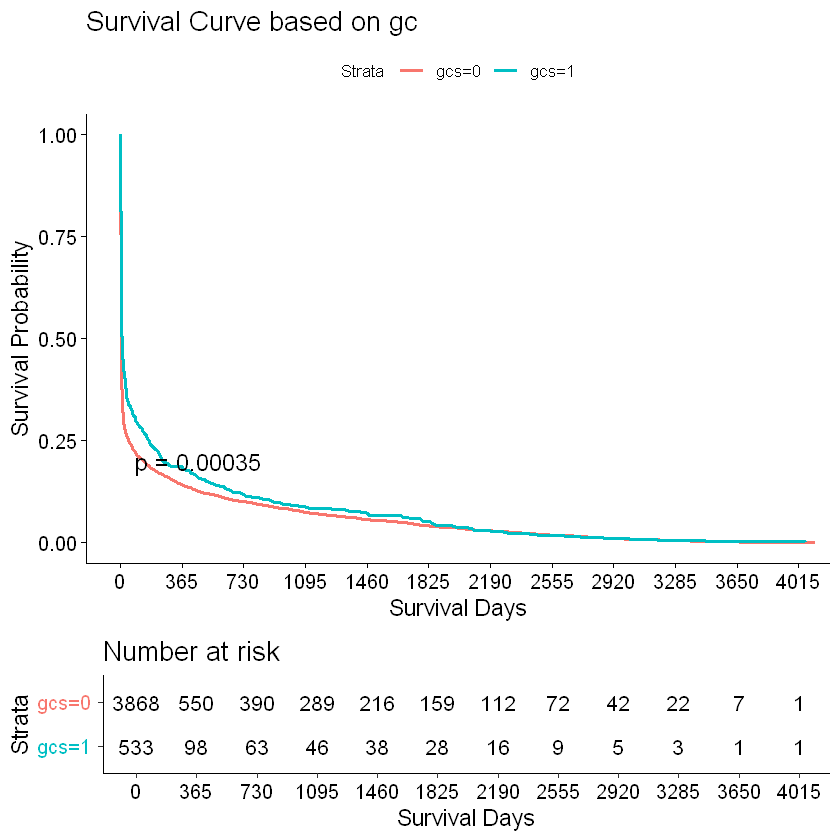

In [20]:
# 加载所需库
library(survival)
library(survminer)

# 创建生存分析对象
surv_obj <- with(full_data, Surv(survival_days))

# 绘制生存曲线
ggsurvplot(survfit(surv_obj ~ gcs, data = full_data), data = full_data,
           risk.table = TRUE, # 显示风险表
           pval = TRUE, # 显示p值
           xlab = "Survival Days", # x轴标签
           ylab = "Survival Probability", # y轴标签
           title = "Survival Curve based on gc", # 图表标题
           break.time.by = 365) # 设置x轴的刻度间隔

In [21]:
tab_ps_df

output_path <- "C:/Users/yanghui/Desktop/tab_ps_df.csv"
write.csv(tab_ps_df, file = output_path, row.names = TRUE)



,0,1,p,SMD
,<chr>,<chr>,<chr>,<chr>
n,454,454,,
age (mean (SD)),65.05 (16.14),65.10 (14.88),0.957,0.004
gender = F (%),250 (55.1),252 (55.5),0.947,0.009
weight (mean (SD)),80.94 (24.83),80.70 (23.01),0.883,0.010
sapsii (mean (SD)),39.48 (14.69),37.02 (13.48),0.009,0.175
sofa_24hours (mean (SD)),3.83 (2.92),3.51 (2.93),0.102,0.109
mort_28_day = 1 (%),54 (11.9),49 (10.8),0.676,0.035
infection = 1 (%),318 (95.5),306 (93.9),0.448,0.073
survival_days (mean (SD)),190.20 (505.78),290.44 (657.03),0.010,0.171


In [22]:

wtd_pval <- tab_wtd_df %>%
    setNames(c("trtd", "ctrl", "pval")) %>%
    mutate(cov = rownames(.)) %>%
    mutate_all(funs(str_replace_all(., "\\s+$|^\\s+", ""))) %>%
    mutate(cov = strsplit(cov, " ") %>% map_chr(first)) %>%
    filter(!is.null(pval) & !is.na(pval) & pval != "") %>%
    mutate(pval = str_replace_all(pval, "<", "")) %>%
    mutate(pval = as.numeric(pval)) %>%
    dplyr::select(cov, pval)



wtd_pval

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


,cov,pval
,<chr>,<dbl>
age (mean (SD)),age,0.182
gender = F (%),gender,0.579
weight (mean (SD)),weight,0.957
sapsii (mean (SD)),sapsii,0.552
sofa_24hours (mean (SD)),sofa_24hours,0.118
mort_28_day = 1 (%),mort_28_day,0.554
survival_days (mean (SD)),survival_days,0.057
infection_flag = 1 (%),infection_flag,0.909
vs_map_first (mean (SD)),vs_map_first,0.804


In [23]:




tab_fmt <- tab_df %>%
  setNames(c("ctrl", "trtd", "pval", "smd")) %>%
  mutate(cov = rownames(.)) %>%
  mutate(ctrl = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                       str_extract(ctrl, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                       ctrl)) %>%
  mutate(trtd = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                       str_extract(trtd, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                       trtd)) %>%
  dplyr::select(cov, ctrl, trtd, pval, smd)

# 移除空的"test"列
tab_fmt <- tab_fmt[, !grepl("^test$", colnames(tab_fmt))]

# 打印出tab_fmt表格
print(tab_fmt)

                                                                  cov
n                                                                   n
age (mean (SD))                                       age (mean (SD))
gender = F (%)                                         gender = F (%)
weight (mean (SD))                                 weight (mean (SD))
sapsii (mean (SD))                                 sapsii (mean (SD))
sofa_24hours (mean (SD))                     sofa_24hours (mean (SD))
mort_28_day = 1 (%)                               mort_28_day = 1 (%)
survival_days (mean (SD))                   survival_days (mean (SD))
infection_flag = 1 (%)                         infection_flag = 1 (%)
vs_map_first (mean (SD))                     vs_map_first (mean (SD))
vs_heart_rate_first (mean (SD))       vs_heart_rate_first (mean (SD))
vs_temp_first (mean (SD))                   vs_temp_first (mean (SD))
lab_wbc_first (mean (SD))                   lab_wbc_first (mean (SD))
lab_hemoglobin_first

tab_fmt <- tab_df %>%
setNames(c("ctrl", "trtd", "pval", "smd")) %>%
mutate(cov = rownames(.)) %>%
mutate(ctrl = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                     str_extract(ctrl, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                     ctrl)) %>%
mutate(trtd = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                     str_extract(trtd, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                     trtd)) %>%
dplyr::select(cov, ctrl, trtd, pval, smd)

tab_fmt


In [24]:
tab_ps_fmt <- tab_ps_df %>%
setNames(c("ctrl", "trtd", "pval", "smd")) %>%
mutate(cov = rownames(.)) %>%
mutate(ctrl = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                     str_extract(ctrl, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                     ctrl)) %>%
mutate(trtd = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                     str_extract(trtd, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                     trtd)) %>%
dplyr::select(cov, ctrl, trtd, smd)

tab_ps_fmt
# 这里出问题是因前面的tab_ps_df数据框生成的问题，要去掉test





,cov,ctrl,trtd,smd
,<chr>,<chr>,<chr>,<chr>
n,n,454,454,
age (mean (SD)),age (mean (SD)),65.05 (16.14),65.10 (14.88),0.004
gender = F (%),gender = F (%),55.1%,55.5%,0.009
weight (mean (SD)),weight (mean (SD)),80.94 (24.83),80.70 (23.01),0.010
sapsii (mean (SD)),sapsii (mean (SD)),39.48 (14.69),37.02 (13.48),0.175
sofa_24hours (mean (SD)),sofa_24hours (mean (SD)),3.83 (2.92),3.51 (2.93),0.109
mort_28_day = 1 (%),mort_28_day = 1 (%),11.9%,10.8%,0.035
infection = 1 (%),infection = 1 (%),95.5%,93.9%,0.073
survival_days (mean (SD)),survival_days (mean (SD)),190.20 (505.78),290.44 (657.03),0.171


In [25]:


tab_ps_fmt <- tab_ps_df %>%
  setNames(c("ctrl", "trtd", "pval", "smd")) %>%
  mutate(cov = rownames(.)) %>%
  mutate(ctrl = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                       str_extract(ctrl, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                       ctrl)) %>%
  mutate(trtd = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                       str_extract(trtd, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                       trtd)) %>%
  dplyr::select(cov, ctrl, trtd, smd)


  
tab_ps_fmt

,cov,ctrl,trtd,smd
,<chr>,<chr>,<chr>,<chr>
n,n,454,454,
age (mean (SD)),age (mean (SD)),65.05 (16.14),65.10 (14.88),0.004
gender = F (%),gender = F (%),55.1%,55.5%,0.009
weight (mean (SD)),weight (mean (SD)),80.94 (24.83),80.70 (23.01),0.010
sapsii (mean (SD)),sapsii (mean (SD)),39.48 (14.69),37.02 (13.48),0.175
sofa_24hours (mean (SD)),sofa_24hours (mean (SD)),3.83 (2.92),3.51 (2.93),0.109
mort_28_day = 1 (%),mort_28_day = 1 (%),11.9%,10.8%,0.035
infection = 1 (%),infection = 1 (%),95.5%,93.9%,0.073
survival_days (mean (SD)),survival_days (mean (SD)),190.20 (505.78),290.44 (657.03),0.171


由于数据框tab_ps_df具有空白的列名，导致在进行转换操作时出现了错误。为了解决这个问题，我们可以先将数据框的列名重新命名，然后再进行转换操作。请尝试以下修正后的代码：这里需要逐步看报错的内容，再进行进一步的操作。

In [26]:
tab_wtd_fmt <- tab_wtd_df %>%
setNames(c("ctrl", "trtd", "pval")) %>%
mutate(cov = rownames(.)) %>%
mutate(ctrl = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                     str_extract(ctrl, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                     ctrl)) %>%
mutate(trtd = ifelse((grepl("%", cov) & grepl("=", cov)) | grepl("^\\s+", cov),
                     str_extract(trtd, "\\((.*?)\\)") %>% str_replace_all("\\(|\\)", "") %>% sprintf("%s%%", .),
                     trtd)) %>%
dplyr::select(cov, ctrl, trtd, pval)

tab_wtd_fmt




,cov,ctrl,trtd,pval
,<chr>,<chr>,<chr>,<chr>
n,n,4344.95,3242.04,
age (mean (SD)),age (mean (SD)),64.12 (15.19),65.21 (14.96),0.182
gender = F (%),gender = F (%),52.4%,53.9%,0.579
weight (mean (SD)),weight (mean (SD)),81.06 (22.33),81.13 (21.80),0.957
sapsii (mean (SD)),sapsii (mean (SD)),36.76 (13.89),36.39 (12.61),0.552
sofa_24hours (mean (SD)),sofa_24hours (mean (SD)),3.68 (3.01),3.46 (2.77),0.118
mort_28_day = 1 (%),mort_28_day = 1 (%),9.9%,9.1%,0.554
survival_days (mean (SD)),survival_days (mean (SD)),223.11 (589.71),286.15 (631.31),0.057
infection_flag = 1 (%),infection_flag = 1 (%),73.9%,73.7%,0.909


In [27]:



tab_raw <- tab_fmt %>%
  full_join(tab_ps_fmt, by = "cov") %>%
  mutate_all(list(~str_replace_all(., "\\s+$|^\\s+", ""))) %>%
  mutate(cov = strsplit(cov, " ") %>% map_chr(first)) %>%
  left_join(tab_ps_pval_df, by = "cov")

  tab_raw

cov,ctrl.x,trtd.x,pval.x,smd.x,ctrl.y,trtd.y,smd.y,pval.y
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
n,3868,533,,,454,454,,
age,64.02 (15.15),64.77 (15.00),0.284,0.049,65.05 (16.14),65.10 (14.88),0.004,0.958
gender,52.1%,56.5%,0.066,0.087,55.1%,55.5%,0.009,0.945
weight,81.05 (22.06),80.41 (23.18),0.549,0.028,80.94 (24.83),80.70 (23.01),0.010,0.886
sapsii,36.61 (13.80),38.56 (14.32),0.003,0.139,39.48 (14.69),37.02 (13.48),0.175,0.006
sofa_24hours,3.68 (3.01),3.69 (2.97),0.942,0.003,3.83 (2.92),3.51 (2.93),0.109,0.102
mort_28_day,9.8%,12.0%,0.125,0.072,11.9%,10.8%,0.035,0.661
survival_days,222.00 (589.57),270.99 (618.83),0.085,0.081,190.20 (505.78),290.44 (657.03),0.171,0.01
infection_flag,74.0%,71.9%,0.306,0.049,NA,NA,NA,0.663


In [28]:
tab_fmt %>%
setNames(c("cov", "Non-GCs", "GCs", "p value", "SMD")) %>%
full_join(tab_wtd_fmt %>%
          setNames(c("cov", "Non-GCs (weighted cohort)", "GCs (weighted cohort)",
                     "p value (weighted cohort)")), by = "cov") %>%
full_join(tab_ps_fmt %>%
          setNames(c("cov", "Non-GCs (PS matching)", "GCs (PS matching)",
                     "SMD (PS matching)")), by = "cov") %>%
mutate_all(funs(str_replace_all(., "\\s+$|^\\s+", ""))) %>%
mutate(cov_ = strsplit(cov, " ") %>% map_chr(first)) %>%
left_join(tab_ps_pval_df %>%
          setNames(c("cov_", "p value (PS matching)")), by = "cov_")

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


cov,Non-GCs,GCs,p value,SMD,Non-GCs (weighted cohort),GCs (weighted cohort),p value (weighted cohort),Non-GCs (PS matching),GCs (PS matching),SMD (PS matching),cov_,p value (PS matching)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
n,3868,533,,,4344.95,3242.04,,454,454,,n,
age (mean (SD)),64.02 (15.15),64.77 (15.00),0.284,0.049,64.12 (15.19),65.21 (14.96),0.182,65.05 (16.14),65.10 (14.88),0.004,age,0.958
gender = F (%),52.1%,56.5%,0.066,0.087,52.4%,53.9%,0.579,55.1%,55.5%,0.009,gender,0.945
weight (mean (SD)),81.05 (22.06),80.41 (23.18),0.549,0.028,81.06 (22.33),81.13 (21.80),0.957,80.94 (24.83),80.70 (23.01),0.010,weight,0.886
sapsii (mean (SD)),36.61 (13.80),38.56 (14.32),0.003,0.139,36.76 (13.89),36.39 (12.61),0.552,39.48 (14.69),37.02 (13.48),0.175,sapsii,0.006
sofa_24hours (mean (SD)),3.68 (3.01),3.69 (2.97),0.942,0.003,3.68 (3.01),3.46 (2.77),0.118,3.83 (2.92),3.51 (2.93),0.109,sofa_24hours,0.102
mort_28_day = 1 (%),9.8%,12.0%,0.125,0.072,9.9%,9.1%,0.554,11.9%,10.8%,0.035,mort_28_day,0.661
survival_days (mean (SD)),222.00 (589.57),270.99 (618.83),0.085,0.081,223.11 (589.71),286.15 (631.31),0.057,190.20 (505.78),290.44 (657.03),0.171,survival_days,0.01
infection_flag = 1 (%),74.0%,71.9%,0.306,0.049,73.9%,73.7%,0.909,NA,NA,NA,infection_flag,0.663


In [29]:
tab_full_fmt <-
tab_fmt %>%
setNames(c("cov", "Non-GCs", "GCs", "p value", "SMD")) %>%
full_join(tab_wtd_fmt %>%
          setNames(c("cov", "Non-GCs (weighted cohort)", "GCs (weighted cohort)",
                     "p value (weighted cohort)")), by = "cov") %>%
full_join(tab_ps_fmt %>%
          setNames(c("cov", "Non-GCs (PS matching)", "GCs (PS matching)",
                     "SMD (PS matching)")), by = "cov") %>%
mutate_all(funs(str_replace_all(., "\\s+$|^\\s+", ""))) %>%
mutate(cov_ = strsplit(cov, " ") %>% map_chr(first)) %>%
left_join(tab_ps_pval_df %>%
          setNames(c("cov_", "p value (PS matching)")), by = "cov_") %>%
left_join(missing %>%
          setNames(c("cov_", "Missing data")), by = "cov_") %>%
mutate(cov = str_replace_all(cov_, "_", " ")) %>%
mutate(cov = str_replace_all(cov, "lab|vs|flag|icd|first", "")) %>%
mutate_all(funs(str_replace_all(., "\\s+$|^\\s+", ""))) %>%
mutate(cov = case_when(
    grepl("icd|vs|lab|day", cov_) ~ toupper(cov),
    TRUE ~ tools::toTitleCase(cov)
)) %>%
mutate(cov = case_when(
    cov == "Gender" ~ "Gender (Female)",
    cov == "Careunit" ~ "Service Unit (MICU vs SICU)",
    cov == "Weight" ~ "Weight (Kg)",
    cov == "Elix Score" ~ "Elixhauser Score",
    cov == "Saps" ~ "SAPS Score",
    cov == "Sofa" ~ "SOFA Score",
    cov == "Vent" ~ "Mechanical Ventilation Use (1st 24 Hours)",
    cov == "Vaso" ~ "Vasopressor Use (1st 24 Hours)",
    cov == "Sedative" ~ "Sedative Use (1st 24 Hours)",
    cov == "ICU ADM WEEKDAY" ~ "Day of ICU Admission",
    cov == "Icu Adm Hour" ~ "Hour of ICU Admission",
    cov == "TEMP" ~ "Temperature (C)",
    cov == "HEART RATE" ~ "Heart Rate",
    cov %in% c("TROPONIN", "BNP", "CREATININE KINASE") ~ paste(cov, "(tested)"),
    TRUE ~ cov
)) %>%
dplyr::select(-cov_) %>%
rename(Covariate = cov) %>%
dplyr::select(1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13)

tab_full_fmt

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"
Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


Covariate,Non-GCs,GCs,SMD,p value,Non-GCs (weighted cohort),GCs (weighted cohort),p value (weighted cohort),Non-GCs (PS matching),GCs (PS matching),SMD (PS matching),p value (PS matching),Missing data
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
n,3868,533,,,4344.95,3242.04,,454,454,,,NA
Age,64.02 (15.15),64.77 (15.00),0.049,0.284,64.12 (15.19),65.21 (14.96),0.182,65.05 (16.14),65.10 (14.88),0.004,0.958,0%
Gender (Female),52.1%,56.5%,0.087,0.066,52.4%,53.9%,0.579,55.1%,55.5%,0.009,0.945,0%
Weight (Kg),81.05 (22.06),80.41 (23.18),0.028,0.549,81.06 (22.33),81.13 (21.80),0.957,80.94 (24.83),80.70 (23.01),0.010,0.886,0.9%
Sapsii,36.61 (13.80),38.56 (14.32),0.139,0.003,36.76 (13.89),36.39 (12.61),0.552,39.48 (14.69),37.02 (13.48),0.175,0.006,0%
Sofa 24hours,3.68 (3.01),3.69 (2.97),0.003,0.942,3.68 (3.01),3.46 (2.77),0.118,3.83 (2.92),3.51 (2.93),0.109,0.102,0%
MORT 28 DAY,9.8%,12.0%,0.072,0.125,9.9%,9.1%,0.554,11.9%,10.8%,0.035,0.661,0%
SURVIVAL DAYS,222.00 (589.57),270.99 (618.83),0.081,0.085,223.11 (589.71),286.15 (631.31),0.057,190.20 (505.78),290.44 (657.03),0.171,0.01,0%
Infection,74.0%,71.9%,0.049,0.306,73.9%,73.7%,0.909,NA,NA,NA,0.663,0%


In [30]:
tab_report <- tab_full_fmt %>%
filter(! Covariate %in% as.character(0:24)) %>%
dplyr::select(1, 2, 3, 4, 9, 10, 11, 13)

tab_report

Covariate,Non-GCs,GCs,SMD,Non-GCs (PS matching),GCs (PS matching),SMD (PS matching),Missing data
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
n,3868,533,,454,454,,NA
Age,64.02 (15.15),64.77 (15.00),0.049,65.05 (16.14),65.10 (14.88),0.004,0%
Gender (Female),52.1%,56.5%,0.087,55.1%,55.5%,0.009,0%
Weight (Kg),81.05 (22.06),80.41 (23.18),0.028,80.94 (24.83),80.70 (23.01),0.010,0.9%
Sapsii,36.61 (13.80),38.56 (14.32),0.139,39.48 (14.69),37.02 (13.48),0.175,0%
Sofa 24hours,3.68 (3.01),3.69 (2.97),0.003,3.83 (2.92),3.51 (2.93),0.109,0%
MORT 28 DAY,9.8%,12.0%,0.072,11.9%,10.8%,0.035,0%
SURVIVAL DAYS,222.00 (589.57),270.99 (618.83),0.081,190.20 (505.78),290.44 (657.03),0.171,0%
Infection,74.0%,71.9%,0.049,NA,NA,NA,0%


In [31]:
data.table::fwrite(tab_full_fmt, file.path(data_dir, "tableone_full.csv"))
data.table::fwrite(tab_raw, file.path(data_dir, "tableone_raw.csv"))
data.table::fwrite(tab_report, file.path(data_dir, "tableone_report.csv"))
data.table::fwrite(wtd_pval, file.path(data_dir, "wtd_pval.csv"))

data.table::fwrite(ps_df, file.path(data_dir, "ps_df.csv"))

ERROR: Error in data.table::fwrite(tab_report, file.path(data_dir, "tableone_report.csv")): Permission denied: '../data/tableone_report.csv'. Failed to open existing file for writing. Do you have write permission to it? Is this Windows and does another process such as Excel have it open?
